# ETL and Business Intelligence Project - Walmart Sales Data

## Step 0: Prerequisite Installs

Before running this project you must have the following installed:
- Python
- Pandas
- Numpy
- PostgreSQL

## Step 1: Preliminaries

- Import required libraries
- Set defaults for visualizations
- Download the dataset and review the files included with the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/anandaramg/global-superstore' 

In [5]:
!pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./global-superstore" (use force=True to force download)


In [7]:
data_dir = './global-superstore'

In [8]:
import os
os.listdir(data_dir)

['Global Superstore.txt']

## Step 2: Load to Pandas to Determine the Best Data Types

- Load the dataset into a data frame using Pandas
- Analyze the data types and ranges of values for each column


In [9]:
file_name = os.listdir(data_dir)[0]

In [10]:
df = pd.read_csv(f"{data_dir}/{file_name}", sep='\t')

In [11]:
df.head(10)

,Category,City,Country,Customer ID,Customer Name,Discount,Market,记录数,Order Date,Order ID,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
5,Office Supplies,Los Angeles,United States,JF-154904,Jeremy Farry,0.0,US,1,2011-10-19 00:00:00.000,CA-2011-117317,...,13,Consumer,2011-10-19 00:00:00.000,Same Day,2.39,California,Paper,2011,North America,43
6,Office Supplies,Los Angeles,United States,WB-218504,William Brown,0.0,US,1,2011-11-04 00:00:00.000,CA-2011-125829,...,19,Consumer,2011-11-11 00:00:00.000,Standard Class,1.15,California,Paper,2011,North America,45
7,Office Supplies,Los Angeles,United States,JA-159704,Joseph Airdo,0.0,US,1,2011-11-12 00:00:00.000,CA-2011-151295,...,12,Consumer,2011-11-16 00:00:00.000,Standard Class,0.92,California,Paper,2011,North America,46
8,Office Supplies,Los Angeles,United States,SP-209204,Susan Pistek,0.0,US,1,2011-11-22 00:00:00.000,CA-2011-135090,...,54,Consumer,2011-11-26 00:00:00.000,Standard Class,6.98,California,Paper,2011,North America,48
9,Office Supplies,Los Angeles,United States,RL-196154,Rob Lucas,0.0,US,1,2011-12-05 00:00:00.000,CA-2011-133830,...,49,Consumer,2011-12-10 00:00:00.000,Standard Class,1.99,California,Paper,2011,North America,50


In [12]:
df.dtypes

Category           object
City               object
Country            object
Customer ID        object
Customer Name      object
Discount          float64
Market             object
记录数                 int64
Order Date         object
Order ID           object
Order Priority     object
Product ID         object
Product Name       object
Profit            float64
Quantity            int64
Region             object
Row ID              int64
Sales               int64
Segment            object
Ship Date          object
Ship Mode          object
Shipping Cost     float64
State              object
Sub-Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [13]:
list(df.columns)

['Category',
 'City',
 'Country',
 'Customer ID',
 'Customer Name',
 'Discount',
 'Market',
 '记录数',
 'Order Date',
 'Order ID',
 'Order Priority',
 'Product ID',
 'Product Name',
 'Profit',
 'Quantity',
 'Region',
 'Row ID',
 'Sales',
 'Segment',
 'Ship Date',
 'Ship Mode',
 'Shipping Cost',
 'State',
 'Sub-Category',
 'Year',
 'Market2',
 'weeknum']

In [14]:
all_columns = list(df.columns)
all_columns

['Category',
 'City',
 'Country',
 'Customer ID',
 'Customer Name',
 'Discount',
 'Market',
 '记录数',
 'Order Date',
 'Order ID',
 'Order Priority',
 'Product ID',
 'Product Name',
 'Profit',
 'Quantity',
 'Region',
 'Row ID',
 'Sales',
 'Segment',
 'Ship Date',
 'Ship Mode',
 'Shipping Cost',
 'State',
 'Sub-Category',
 'Year',
 'Market2',
 'weeknum']

In [15]:
# change all the column names to lower case and replace spaces and dashes with underscores
all_columns_lower = []

for col in all_columns:
    new_col_name = col.lower().replace(' ', '_').replace('-', '_')
    all_columns_lower.append(new_col_name)
    
all_columns_lower

['category',
 'city',
 'country',
 'customer_id',
 'customer_name',
 'discount',
 'market',
 '记录数',
 'order_date',
 'order_id',
 'order_priority',
 'product_id',
 'product_name',
 'profit',
 'quantity',
 'region',
 'row_id',
 'sales',
 'segment',
 'ship_date',
 'ship_mode',
 'shipping_cost',
 'state',
 'sub_category',
 'year',
 'market2',
 'weeknum']

In [16]:
df.columns = all_columns_lower

Find all the string columns and the length of the longest string

In [17]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [18]:
string_columns

['category',
 'city',
 'country',
 'customer_id',
 'customer_name',
 'market',
 'order_date',
 'order_id',
 'order_priority',
 'product_id',
 'product_name',
 'region',
 'segment',
 'ship_date',
 'ship_mode',
 'state',
 'sub_category',
 'market2']

In [19]:
string_cols = []
for col in list(df.columns):
    if (df[col].dtype == 'object'):
        max_len = df[col].map(lambda x: len(x)).max() 
        string_cols.append((col, max_len))

string_cols

[('category', 15),
 ('city', 35),
 ('country', 32),
 ('customer_id', 9),
 ('customer_name', 22),
 ('market', 6),
 ('order_date', 23),
 ('order_id', 15),
 ('order_priority', 8),
 ('product_id', 16),
 ('product_name', 127),
 ('region', 14),
 ('segment', 11),
 ('ship_date', 23),
 ('ship_mode', 14),
 ('state', 36),
 ('sub_category', 11),
 ('market2', 13)]

In [20]:
df.category.value_counts()

category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [21]:
df.market2.value_counts()

market2
APAC             11002
North America    10378
LATAM            10294
EU               10000
EMEA              5029
Africa            4587
Name: count, dtype: int64

In [23]:
int_cols = []

for col in list(df.columns):
    if (df[col].dtype == 'int64'):
        max_val = df[col].max() 
        int_cols.append((col, max_val))

int_cols

[('记录数', 1),
 ('quantity', 14),
 ('row_id', 51290),
 ('sales', 22638),
 ('year', 2014),
 ('weeknum', 53)]

## Step 3: Load the data to a Stage Table in a PostgreSQL Database

From the terminal, navigate to the project directory and then run the following:<br>  
First we'll create a new database named walmart<br>
Next we'll set the local path<br>
Lastly, we'll load the staging table to the walmart database<br>
```SHELL
createdb walmart
\set localpath `pwd`'/global-superstore/Global Superstore.txt'
psql -d walmart < load_staging_table.sql
```

### Connect to the database

In [24]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [25]:
env_var = os.environ

Create a new file in your `~/.pgadmin` folder called `pgadmin.json` with the following contents:<br>
`{"user":"yourusernamehere","password":"yourpasswordhere"}`

In [26]:
home = env_var['HOME']

In [27]:
import json

data_dir = rf"{home}/.pgadmin/pgadmin.json"
with open(data_dir) as json_file:
    config = json.load(json_file)

In [28]:
import psycopg2

In [40]:
con = psycopg2.connect(
database="walmart_test",
user=config['user'],
password=config['password'],
host="localhost",
port= '5432'
)

In [30]:
# pass in the connection and the sql, returns a dataframe
def sql_query(connection, sql):
    cursor_obj = connection.cursor()
    cursor_obj.execute(sql)
    records = cursor_obj.fetchall()
    colnames = [desc[0] for desc in cursor_obj.description]
    df = pd.DataFrame(records, columns = colnames)
    cursor_obj.close()
    return df

In [31]:
# Verifying that we can query our stage table from here
df_stg_orders = sql_query(con, "SELECT * FROM public.stg_orders;")

In [32]:
df_stg_orders.head()

,id,category,city,country,customer_id,customer_name,discount,market,记录数,order_date,...,ship_date,ship_mode,ship_cost,state,subcategory,year,market2,weeknum,file_id,insert_date
0,1,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,1,2011-01-07,...,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2,1,2024-03-01 13:52:20.441866
1,2,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,1,2011-01-21,...,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4,1,2024-03-01 13:52:20.441866
2,3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,...,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32,1,2024-03-01 13:52:20.441866
3,4,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,1,2011-08-05,...,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32,1,2024-03-01 13:52:20.441866
4,5,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,1,2011-09-29,...,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40,1,2024-03-01 13:52:20.441866


In [33]:
# Checking to see if any of the critical ID values are null
# These records would need to be written to an error table or at least removed from stage
sql = """SELECT *
FROM public.temp_orders
WHERE order_id IS NULL
OR customer_id IS NULL
OR product_id IS NULL;"""
df_null_ids = sql_query(con, sql)

In [34]:
# There are zero records returned
df_null_ids.head()

,category,city,country,customer_id,customer_name,discount,market,记录数,order_date,order_id,...,sales,segment,ship_date,ship_mode,ship_cost,state,subcategory,year,market2,weeknum


## Step 4: Analyze the Stage Data to Determine the Target Table Structure
- Understand the level of granularity of each column 
- Check for duplicate data

The following SQL was run in PG Admin to answer questions about how to structure the target tables - filename: `data_analysis.sql`
```SQL
-- data analysis to understand the granularity of the data

-- First check the Stage table
SELECT COUNT(*)
FROM public.stg_orders;
-- 51290 rows

-- Checking to see if any of the ID values are null
-- These records would need to be written to an error table or at least removed from stage
SELECT *
FROM public.temp_orders
WHERE order_id IS NULL
OR customer_id IS NULL
OR product_id IS NULL;
-- 0 rows

SELECT * FROM public.stg_orders
ORDER BY order_id, customer_id, order_date
LIMIT 100;

-- Let's determine what is on the product level
-- This would not change based on an order but could change over time
-- let's guess that a product is defined by a product_id
-- product_name, category, subcategory would seem to go with a product

-- let's see if we can have different product_name values for a given product_id
SELECT *
FROM public.stg_orders orders
JOIN
(SELECT product_id, COUNT(DISTINCT product_name)
FROM public.stg_orders
GROUP BY product_id
HAVING COUNT(DISTINCT product_name) > 1) dupes
ON orders.product_id = dupes.product_id
ORDER BY orders.product_id, orders.product_name;
-- product_name can vary for a given product_id
-- the primary key for product will be product_id and product_name

-- let's check category using our new primary key
SELECT product_id, product_name, COUNT(DISTINCT category)
FROM public.stg_orders
GROUP BY product_id, product_name
HAVING COUNT(DISTINCT category) > 1
-- category is distinct at the product_id/product_name level

-- let's check subcategory
SELECT product_id, product_name, COUNT(DISTINCT subcategory)
FROM public.stg_orders
GROUP BY product_id, product_name
HAVING COUNT(DISTINCT subcategory) > 1
-- subcategory is distinct at the product_id/product_name level

-- May be easiest to introduce an autoincrementing unique key for a product
-- to the products table
-- We can add this as a foreign key to the orders_products join table

-- Let's determine what is on the customer level
-- This would not change based on an order but could change over time
-- let's guess that a customer is defined by a customer_id
-- customer_name, segment, and market would seem to go with a customer
-- what about city and country?
-- let's see if we can have different product_name values for a given product_id
SELECT customer_id, COUNT(DISTINCT customer_name)
FROM public.stg_orders
GROUP BY customer_id
HAVING COUNT(DISTINCT customer_name) > 1;
-- customer_id looks like the correct primary key
-- each customer has a unique customer name

-- let's check segment
SELECT customer_id, COUNT(DISTINCT segment)
FROM public.stg_orders
GROUP BY customer_id
HAVING COUNT(DISTINCT segment) > 1;
-- segment is distinct at the customer_id level

-- let's check market
SELECT customer_id, COUNT(DISTINCT market)
FROM public.stg_orders
GROUP BY customer_id
HAVING COUNT(DISTINCT market) > 1;
-- market is distinct at the customer_id level

-- Let's determine what is on the order level
-- Is country at the customer level or at the order level?
select customer_id, count(distinct country)
from public.stg_orders
group by customer_id
having count(distinct country) > 1
-- So a customer can have multiple associated countries

-- Can an order have more than one associated country?
select order_id, count(distinct country)
from public.stg_orders
group by order_id
having count(distinct country) > 1
-- So an order can have more than one associated country

-- Can an order/customer combination have more than one associated country?
select order_id, customer_id, count(distinct country)
from public.stg_orders
group by order_id, customer_id
having count(distinct country) > 1
-- no

-- Let's take a look at the rows where there are multiple countries
-- associated with one order_id
select orders.*
from public.stg_orders orders
JOIN 
(select order_id, count(distinct country)
from public.stg_orders
group by order_id
having count(distinct country) > 1) dupes
on orders.order_id = dupes.order_id
ORDER BY orders.order_id, orders.country
-- one order_id can be associated with several countries,
-- customers, order_date values, sales, profit
-- It seems like an order/customer combination is what constitutes an order

-- can you have multiple order_priority values
-- associated with one order/customer combination?
SELECT order_id, customer_id, COUNT(DISTINCT order_priority)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT order_priority) > 1;
-- yes, you can!
-- it's only one order_id/customer_id combination so let's take a look

select *
from public.stg_orders
where order_id = 'ES-2014-1903302'
and customer_id = 'DG-133002';
-- one is Medium, one is High
-- appears that order_priority is at the order/customer/order_date level
-- order dates are different too

-- can one order/customer have multiple countries?
SELECT order_id, customer_id, COUNT(DISTINCT country)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT country) > 1;
-- no

-- can one order/customer have multiple cities?
SELECT order_id, customer_id, COUNT(DISTINCT city)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT city) > 1;
-- no

-- can one order/customer have multiple states?
SELECT order_id, customer_id, COUNT(DISTINCT state)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT state) > 1;
-- no

-- can one customer have multiple regions?
SELECT order_id, customer_id, COUNT(DISTINCT region)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT region) > 1;
-- no

-- can one order/customer combination have multiple order dates?
SELECT order_id, customer_id, COUNT(DISTINCT order_date)
from public.stg_orders
GROUP BY order_id, customer_id
HAVING COUNT(DISTINCT order_date) > 1;
-- yes
-- appears that order_date needs to be added to the key
-- so the key for an order would be order_id/customer_id/order_date

-- can one order have multiple ship dates?
SELECT order_id, customer_id, order_date, COUNT(DISTINCT ship_date)
from public.stg_orders
GROUP BY order_id, customer_id, order_date
HAVING COUNT(DISTINCT ship_date) > 1;
-- no

-- can one order have multiple ship modes?
SELECT order_id, customer_id, order_date, COUNT(DISTINCT ship_mode)
from public.stg_orders
GROUP BY order_id, customer_id, order_date
HAVING COUNT(DISTINCT ship_mode) > 1;
-- no

-- can one order have multiple ship cost?
SELECT order_id, customer_id, order_date, COUNT(DISTINCT ship_cost)
from public.stg_orders
GROUP BY order_id, customer_id, order_date
HAVING COUNT(DISTINCT ship_cost) > 1;
-- yes, so ship_cost appears to be at the order/product level
-- so we'll classify all three shipping fields at this level

-- Shipping columns - additional analysis
-- Is order_id, ship_date, ship_mode, ship_cost enough to identify a unique shipment?
-- These rows represent cases where there are multiple products being sent in one shipment
-- The shipping information is all the same between the rows with the same order_id
-- If we keep the shipping information on the order/product level then we will be 
-- double counting shipping cost for these 24 orders
SELECT orders.*
FROM public.stg_orders orders
JOIN 
(SELECT order_id, ship_date, ship_mode, ship_cost, count(*) 
FROM public.stg_orders
GROUP BY order_id, ship_date, ship_mode, ship_cost
HAVING count(*) > 1) dupes
ON dupes.ship_date = orders.ship_date
AND dupes.ship_mode = orders.ship_mode
AND dupes.ship_cost = orders.ship_cost
AND dupes.order_id = orders.order_id
ORDER by orders.ship_date, orders.ship_mode, orders.ship_cost, orders.order_id;


-- there can of course be multiple products included in each order
SELECT order_id, customer_id, order_date, COUNT(DISTINCT product_id)
FROM public.stg_orders
GROUP BY order_id, customer_id, order_date
HAVING COUNT(DISTINCT product_id) > 1

-- After analysis, here's what was found:
-- An order is defined as the combination of order_id/customer_id/order_date
-- Order level fields: priority, city, state, country, and region fields 

-- Order/Product level fields:
-- quantity, sale_amt, discount, profit, ship_date, ship_mode, ship_cost

-- order/product level and there isn't a shipping identifier so that 
-- this data can be split off to another table easily.
-- The rest of the fields on the orders table are at the order/customer/product 
-- level so it made sense to just put them all in one table instead of splitting 
-- them up.

-- verify that order/customer/order_date/product_id is the lowest level of granularity
select orders.*
from public.stg_orders orders
JOIN 
(SELECT order_id, customer_id, order_date, product_id, COUNT(*)
FROM public.stg_orders
GROUP BY order_id, customer_id, order_date, product_id
HAVING COUNT(*) > 1) dupes
ON orders.order_id = dupes.order_id
AND orders.customer_id = dupes.customer_id
AND orders.order_date = dupes.order_date
AND orders.product_id = dupes.product_id
ORDER BY orders.order_id, orders.customer_id, orders.order_date, orders.product_id, orders.row_id;
-- there are dupe rows where the profit, quantity, and ship_cost values differ
-- these do appear to be duplicates and not rows that should be counted distinctly
-- when we load the target tables we'll take the row with the largest row_id
```

### Key Data Findings:
Natural Keys for the critical segments of the dataset (along with other learnings revealed through the initial data analysis):
* Customer: `customer_id`
* Product: `product_id` and `product_name` (product names are not consistent even though most likely they are the exact same product)
* Order: `order_id`, `customer_id`, and `order_date` (different customers can order under the same `order_id` and the same customer can order on different dates with the same `order_id`)
* Shipping: I couldn't find quite the right natural key for this (there wasn't an obvious key like `shipping_id`) so I decided to store it at the order/product level even though there will be a handful of dupes that will be introduced this way.  This would be a good area to fix as a future enhancement.  Additional understanding of the data would be critical to set this up correctly.

The lowest level of granularity is a distinct combination of order_id/customer_id/order_date/product_id.  However there are dupe rows at this lowest level of granularity - we see that in these cases profit, or quantities or shipping costs may differ between the rows.  It appears that this is where an order has been modified and the decision has been made to load the target tables with the largest row_id from the original file.

### The final Target Data Model:
![Data Model](assets/data_model.jpeg "Data Model")

## Step 5: Load the Target Tables

From the terminal, navigate to the project directory and then run the following to load the target database tables:
```SHELL
psql -d walmart < load_db.sql
```

## Step 6: Decide what to Include in the Aggregate Views

It made sense to include some aggregate views so that the data would already be aggregated when visualizations were created.  This way we wouldn't have to aggregate in Pandas from the target tables first; instead we could pull directly from the aggregate views. The choice was made to use views for the aggregate data so that if the underlying data was updated then the views would be updated automatically.

**Market Level:**<br>
In order to understand how the US compares to the different markets across the world one of the aggregate views will be at the market/country level.  This view will include total orders and total sales.

**Customer Level**<br>
This aggregate view allows us to see which customers have the highest sales.

**Product Level**<br>
This aggregate view allows us to see the quantity of products being sold, the profit for each product, and the total sales of each product.  Since we know that product names can vary across a given product_id, we will choose an arbitrary product name to associate with each product_id.



## Step 7: Create the Aggregate Views
From the terminal, navigate to the project directory and then run the following to load the aggregate views:

```SHELL
psql -d walmart < agg_views.sql
```

This is the SQL used to create the views:
```SQL
-- Create agg views
-- Combine all the data together
CREATE OR REPLACE VIEW agg_full_dataset AS
	SELECT ord.der_order_id,
		   ord.order_id,
		   ord.customer_id,
		   ord.order_date,
		   ord.priority,
		   ord.city,
		   ord.state,
		   ord.country,
		   ord.region,
		   ordprd.quantity,
		   ordprd.sale_amt,
		   ordprd.discount,
		   ordprd.profit,
		   ordprd.ship_date,
		   ordprd.ship_mode,
		   ordprd.ship_cost,
		   prd.der_product_id,
		   prd.product_id,
		   prd.product_name,
		   prd.category,
		   prd.subcategory,
		   cust.customer_name,
		   cust.segment,
		   cust.market
	FROM public.orders ord
	JOIN public.orders_products ordprd
	ON ord.der_order_id = ordprd.der_order_id
	JOIN public.products prd
	ON ordprd.der_product_id = prd.der_product_id
	JOIN public.customers cust
	ON ord.customer_id = cust.customer_id;
	
SELECT *
FROM public.agg_full_dataset
WHERE der_product_id = 55
LIMIT 20;

SELECT MIN(discount), MAX(discount)
FROM public.agg_full_dataset;
-- 0
-- 0.85

SELECT der_product_id, COUNT(distinct discount)
FROM public.agg_full_dataset
GROUP BY der_product_id
HAVING COUNT(distinct discount) > 1;



-- agg_market_sales
CREATE OR REPLACE VIEW agg_market_sales AS
	SELECT 
		market,
		region,
		country,
		DATE_PART('year', order_date) AS order_year, 
		DATE_PART('month', order_date) AS order_month, 
		count(DISTINCT der_order_id) AS total_orders,
		sum(sale_amt) AS total_sales,
		avg(sale_amt) AS average_sale,
		count(DISTINCT customer_id) AS total_customers
	FROM public.agg_full_dataset
	GROUP BY market, region, country, order_year, order_month
	ORDER BY market, region, country, order_year, order_month;

-- agg_customers
CREATE OR REPLACE VIEW agg_customers AS
	SELECT 
		customer_id,
		customer_name,
		market,
		country,
		DATE_PART('year', order_date) AS order_year, 
		DATE_PART('month', order_date) AS order_month,
		sum(sale_amt) AS total_sales
	FROM public.agg_full_dataset
	GROUP BY customer_id, customer_name, market, country, order_year, order_month
	ORDER BY customer_id, customer_name, market, country, order_year, order_month;
	
-- agg_products
-- choose a product_name to go with each distinct product_id
-- will choose the last one (arbitrary decision)
SELECT product_id,
	   product_name
INTO public.TEMP_product_lu
FROM
(SELECT product_id,
	   product_name,
	   ROW_NUMBER() OVER(PARTITION BY product_id
						 ORDER BY der_product_id DESC) as "row_num"
FROM public.agg_full_dataset) DEDUPE
WHERE row_num = 1;

CREATE OR REPLACE VIEW agg_products AS
	SELECT 
		full_ds.product_id,
		prod_lu.product_name,
		category,
		subcategory,
		DATE_PART('year', order_date) AS order_year, 
		DATE_PART('month', order_date) AS order_month,
		AVG(discount) AS avg_discount,
		SUM(profit) AS total_profit,
		SUM(quantity) AS total_quantity,
		SUM(sale_amt) AS total_sales
	FROM public.agg_full_dataset full_ds
	JOIN public.TEMP_product_lu prod_lu
	ON full_ds.product_id = prod_lu.product_id
	GROUP BY full_ds.product_id, prod_lu.product_name, category, 
			 subcategory, order_year, order_month
	ORDER BY full_ds.product_id, prod_lu.product_name, category, 
			 subcategory, order_year, order_month;
```

## Step 8: Visualizations

Now that we have all the views created, let's find the answer to several questions and create some visualizations

### What are the Total Sales by Market by Year and/or Month?

In [41]:
df_agg_sales = sql_query(con, "SELECT * FROM public.agg_market_sales;")

In [42]:
df_agg_sales.head()

,market,region,country,order_year,order_month,total_orders,total_sales,average_sale,total_customers
0,APAC,Central Asia,Afghanistan,2011.0,4.0,1,1159.0,231.8,1
1,APAC,Central Asia,Afghanistan,2011.0,7.0,1,178.0,178.0,1
2,APAC,Central Asia,Afghanistan,2011.0,8.0,1,83.0,83.0,1
3,APAC,Central Asia,Afghanistan,2011.0,12.0,2,308.0,154.0,2
4,APAC,Central Asia,Afghanistan,2012.0,4.0,1,4626.0,4626.0,1


In [43]:
df_agg_sales['order_month'] = df_agg_sales['order_month'].astype(int)
df_agg_sales['order_year'] = df_agg_sales['order_year'].astype(int)


In [44]:
import calendar

df_agg_sales['order_month_word'] = df_agg_sales['order_month'].apply(lambda x: calendar.month_abbr[x])

In [102]:
df_agg_sales.head()

,market,region,country,order_year,order_month,total_orders,total_sales,average_sale,total_customers,order_month_word,US
0,APAC,Central Asia,Afghanistan,2011,4,1,1159.0,231.8,1,Apr,False
1,APAC,Central Asia,Afghanistan,2011,7,1,178.0,178.0,1,Jul,False
2,APAC,Central Asia,Afghanistan,2011,8,1,83.0,83.0,1,Aug,False
3,APAC,Central Asia,Afghanistan,2011,12,2,308.0,154.0,2,Dec,False
4,APAC,Central Asia,Afghanistan,2012,4,1,4626.0,4626.0,1,Apr,False


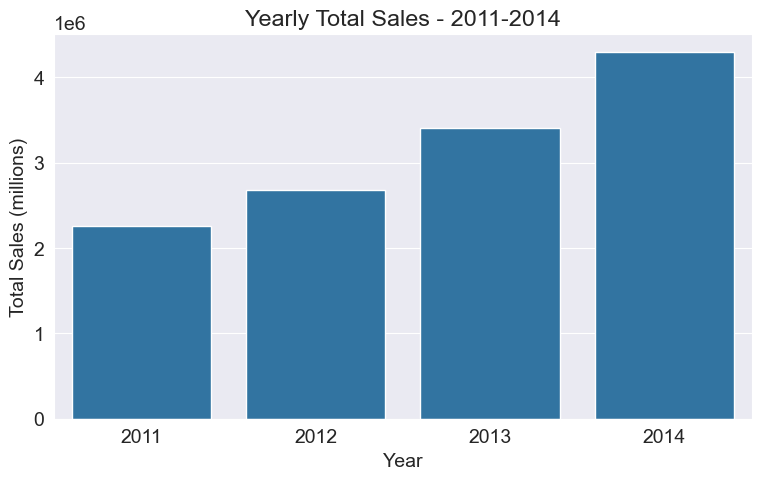

In [73]:
ax = sns.barplot(x='order_year', y='total_sales', estimator="sum", data=df_agg_sales, errorbar=None);
ax.set(xlabel='Year', ylabel='Total Sales (millions)', title='Yearly Total Sales - 2011-2014')
plt.show()

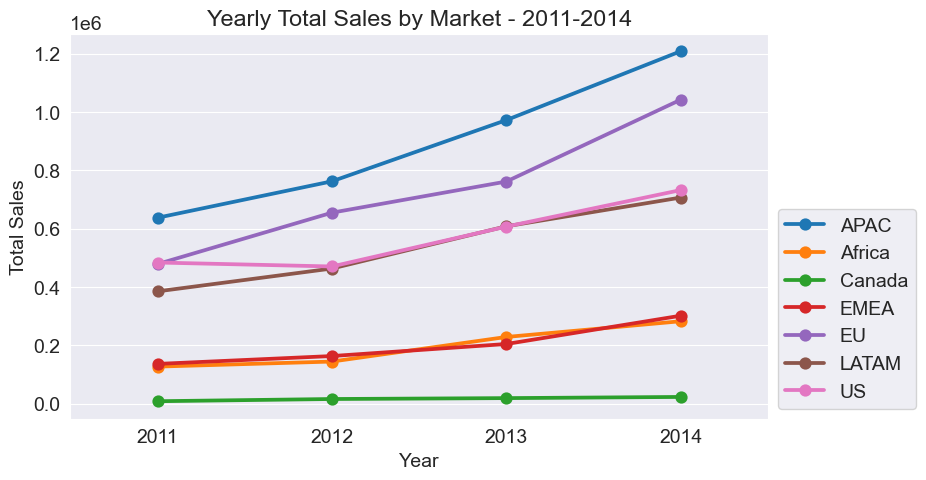

In [99]:
ax = sns.pointplot(x='order_year', y='total_sales', data=df_agg_sales, hue = 'market', estimator="sum", errorbar=None);
ax.set(xlabel='Year', ylabel='Total Sales', title='Yearly Total Sales by Market - 2011-2014')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

Discussion/Analysis: In terms of total sales, APAC is the strongest market followed by the EU.  APAC and the EU have almost doubled its total sales from 2011 to 2014.  The US and LATAM have quite similar total sales for the years 2012, 2013, and 2014 when compared with one another.  The US's total sales was somewhat flat between 2011 and 2012 (and perhaps decreased slightly) and then both the US and LATAM increased from almost 500K in total sales in 2012 to around 700K in 2014.  Africa and EMEA also have very similar total sales when compared with one another and are lower than the US/LATAM.  Africa and EMEA's total sales growth has been at a slightly lesser rate than the US/LATAM.  Canada is in last place and their total sales trend is quite flat over these four years.

In [49]:
months_sorted = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

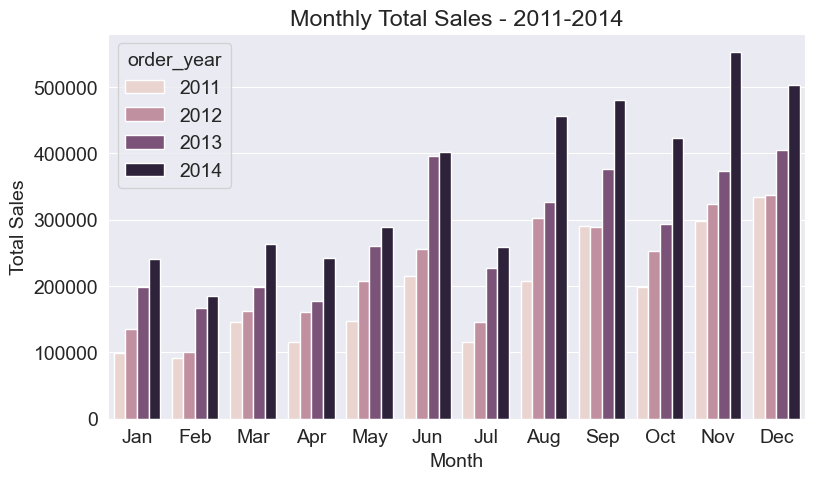

In [65]:
ax = sns.barplot(x='order_month_word', y='total_sales', data=df_agg_sales, hue = 'order_year', order = months_sorted, estimator="sum", errorbar=None);
ax.set(xlabel='Month', ylabel='Total Sales', title='Monthly Total Sales - 2011-2014')
plt.show()

Discussion/Analysis: We do see a year over year increase for most years for a given month.  We notice that August-December of 2014 were very good months overall for total sales.

### Which market contributed the most to these sales in the latter half of 2014?

In [51]:
df_agg_sales_2014 = df_agg_sales[df_agg_sales.order_year == 2014]

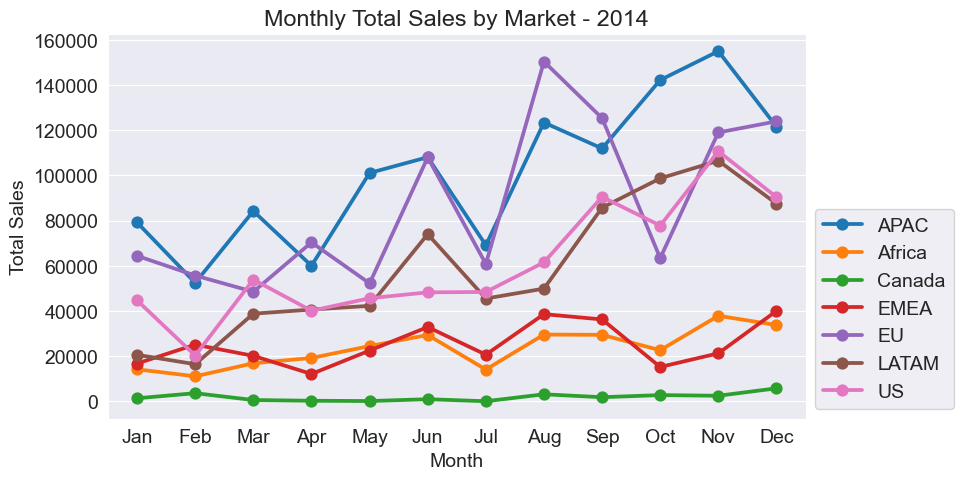

In [96]:
ax = sns.pointplot(x='order_month_word', y='total_sales', data=df_agg_sales_2014, hue = 'market', estimator="sum", order=months_sorted, errorbar=None);
ax.set(xlabel='Month', ylabel='Total Sales', title='Monthly Total Sales by Market - 2014')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

Discussion/Analysis: We see that in the latter half of 2014, APAC and the EU contributed the largest to the total sales except for in October when the EU had a large drop in total sales relative to the surrounding months.  LATAM took second place in October followed by the US in third.

### US total sales - how did the US do in 2014 when compared with 2013?

In [86]:
df_agg_sales_13_14_US = df_agg_sales[((df_agg_sales.order_year == 2014) | (df_agg_sales.order_year == 2013)) & (df_agg_sales.market == 'US')]

In [87]:
df_agg_sales_13_14_US.head()

,market,region,country,order_year,order_month,total_orders,total_sales,average_sale,total_customers,order_month_word,US
3671,US,Central,United States,2013,1,7,5944.0,424.571429,7,Jan,True
3672,US,Central,United States,2013,2,7,1116.0,111.600000,7,Feb,True
3673,US,Central,United States,2013,3,22,13150.0,285.869565,22,Mar,True
3674,US,Central,United States,2013,4,18,7440.0,256.551724,16,Apr,True
3675,US,Central,United States,2013,5,22,11515.0,230.300000,22,May,True


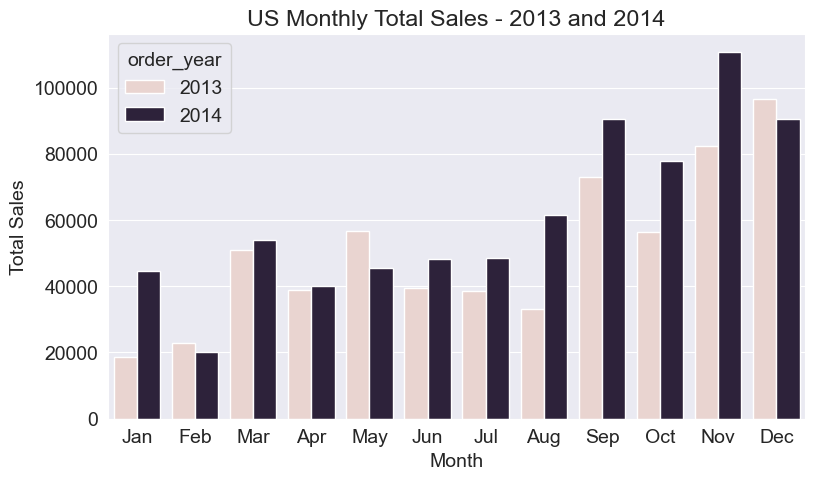

In [88]:
ax = sns.barplot(x='order_month_word', y='total_sales', data=df_agg_sales_13_14_US, hue = 'order_year', order = months_sorted, estimator="sum", errorbar=None);
ax.set(xlabel='Month', ylabel='Total Sales', title='US Monthly Total Sales - 2013 and 2014')
plt.show()

Discussion/Analysis: We see a year over year increase for most months when we compare 2013 and 2014.  The exceptions are February, May, and December where we notice a decrease.  Notable increases were in January, and August through November.

### US Total Sales by Region - which region contributes the most?

In [84]:
df_agg_sales_US = df_agg_sales[df_agg_sales.market == 'US']

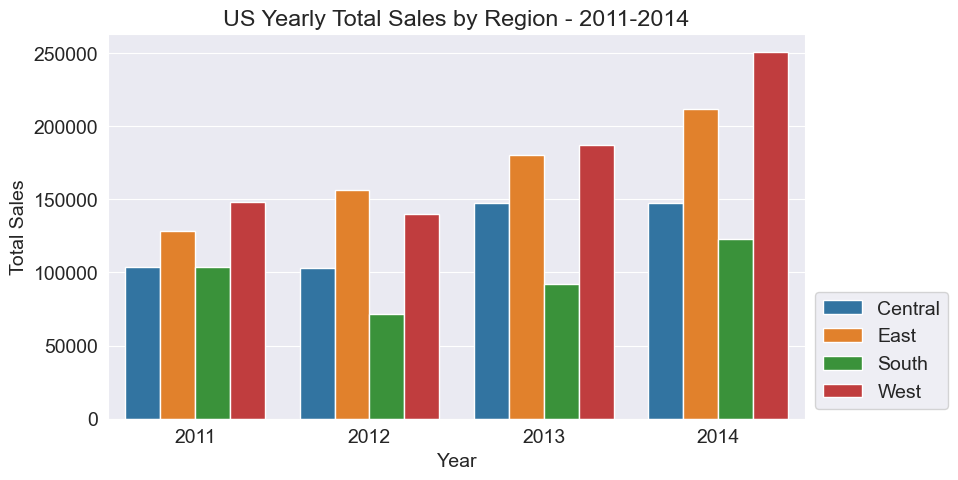

In [89]:
ax = sns.barplot(x='order_year', y='total_sales', data=df_agg_sales_US, hue = 'region', estimator="sum", errorbar=None);
ax.set(xlabel='Year', ylabel='Total Sales', title='US Yearly Total Sales by Region - 2011-2014')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.show()

Discussion/Analysis: The West is the strongest region for the years 2011, 2013, and 2014.  In 2012 the East contributed the most to total sales.  The lowest total sales levels are in the South which had a large decrease in sales from 2011 to 2012 and then it wasn't until 2014 when their sales finally surpassed their 2011 levels. 

### Customer level data - who were the top 5 customers in the US each year?

In [103]:
df_agg_customers = sql_query(con, "SELECT * FROM public.agg_customers;")

In [104]:
df_agg_customers.country.value_counts()

country
United States        4618
France               1447
Australia            1389
Mexico               1310
Germany               998
                     ... 
Slovenia                2
Equatorial Guinea       1
Bahrain                 1
Eritrea                 1
Chad                    1
Name: count, Length: 147, dtype: int64

In [105]:
df_agg_customers['order_month'] = df_agg_customers['order_month'].astype(int)
df_agg_customers['order_year'] = df_agg_customers['order_year'].astype(int)

import calendar

df_agg_customers['order_month_word'] = df_agg_customers['order_month'].apply(lambda x: calendar.month_abbr[x])

In [106]:
df_agg_customers_US = df_agg_customers[df_agg_customers.country == 'United States']

In [107]:
df_agg_customers_US.head()

,customer_id,customer_name,market,country,order_year,order_month,total_sales,order_month_word
14,AA-103154,Alex Avila,US,United States,2011,3,727.0,Mar
15,AA-103154,Alex Avila,US,United States,2011,9,30.0,Sep
16,AA-103154,Alex Avila,US,United States,2012,10,27.0,Oct
17,AA-103154,Alex Avila,US,United States,2013,3,4406.0,Mar
18,AA-103154,Alex Avila,US,United States,2014,6,375.0,Jun


In [108]:
df_US_cust_sales_2011 = df_agg_customers_US[df_agg_customers_US.order_year == 2011].groupby(['customer_id', 'customer_name'], as_index=False)['total_sales'].sum()
df_US_cust_sales_2012 = df_agg_customers_US[df_agg_customers_US.order_year == 2012].groupby(['customer_id', 'customer_name'], as_index=False)['total_sales'].sum()
df_US_cust_sales_2013 = df_agg_customers_US[df_agg_customers_US.order_year == 2013].groupby(['customer_id', 'customer_name'], as_index=False)['total_sales'].sum()
df_US_cust_sales_2014 = df_agg_customers_US[df_agg_customers_US.order_year == 2014].groupby(['customer_id', 'customer_name'], as_index=False)['total_sales'].sum()

In [109]:
df_top_5_US_custs_2011 = df_US_cust_sales_2011.sort_values('total_sales', ascending=False).head()
df_top_5_US_custs_2012 = df_US_cust_sales_2012.sort_values('total_sales', ascending=False).head()
df_top_5_US_custs_2013 = df_US_cust_sales_2013.sort_values('total_sales', ascending=False).head()
df_top_5_US_custs_2014 = df_US_cust_sales_2014.sort_values('total_sales', ascending=False).head()

In [110]:
df_top_5_cust_2011 = df_US_cust_sales_2011[df_US_cust_sales_2011.customer_name.isin(df_top_5_US_custs_2011.customer_name)].sort_values('total_sales')
df_top_5_cust_2012 = df_US_cust_sales_2012[df_US_cust_sales_2012.customer_name.isin(df_top_5_US_custs_2012.customer_name)].sort_values('total_sales')
df_top_5_cust_2013 = df_US_cust_sales_2013[df_US_cust_sales_2013.customer_name.isin(df_top_5_US_custs_2013.customer_name)].sort_values('total_sales')
df_top_5_cust_2014 = df_US_cust_sales_2014[df_US_cust_sales_2014.customer_name.isin(df_top_5_US_custs_2014.customer_name)].sort_values('total_sales')

[Text(0, 0, 'Grant Thornton'),
 Text(1, 0, 'Seth Vernon'),
 Text(2, 0, 'Hunter Lopez'),
 Text(3, 0, 'Tom Ashbrook'),
 Text(4, 0, 'Raymond Buch')]

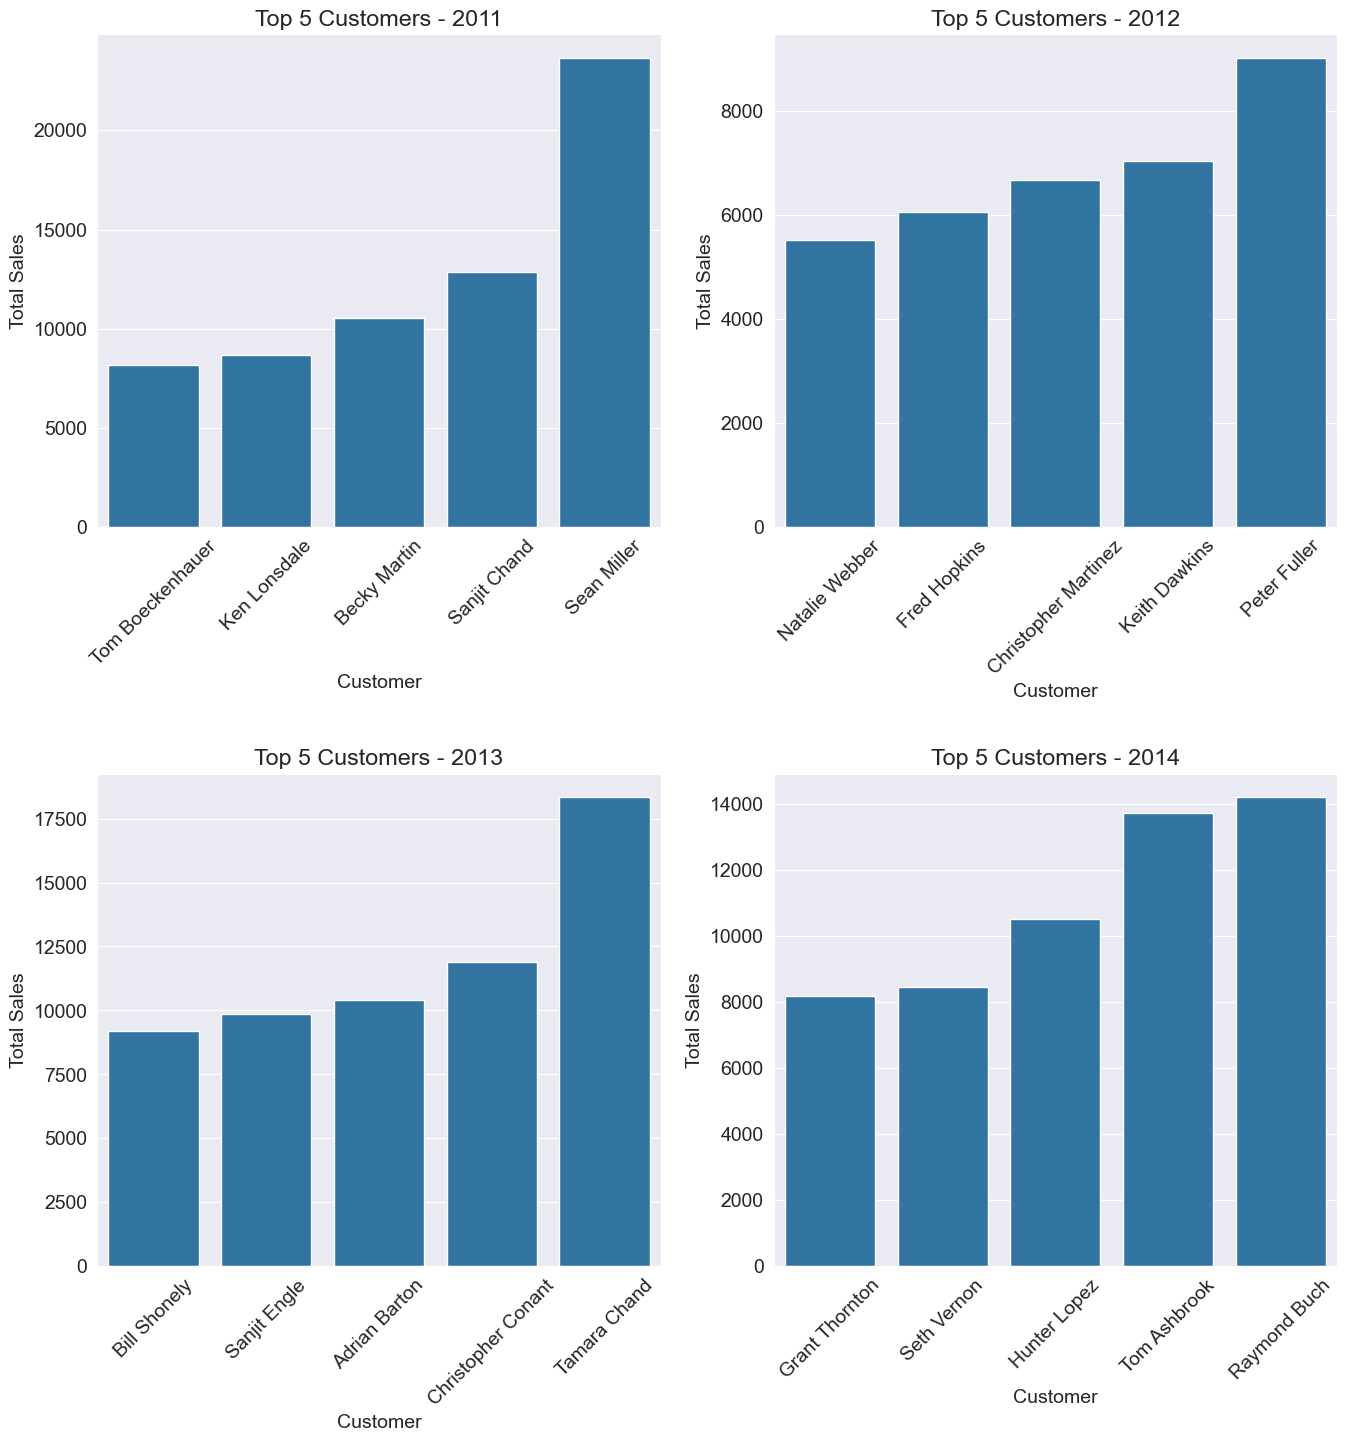

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.5)
x = np.arange(5)  # the label locations

# 2011
axes[0,0].set_title('Top 5 Customers - 2011')
axes[0,0].set_xlabel('Customer')
axes[0,0].set_ylabel('Total Sales')
sns.barplot(x='customer_name', y='total_sales', data=df_top_5_cust_2011, errorbar=None, ax=axes[0,0])
axes[0,0].set_xticks(x, df_top_5_cust_2011.customer_name)
axes[0,0].set_xticklabels(df_top_5_cust_2011.customer_name, rotation=45)

# 2012
axes[0,1].set_title('Top 5 Customers - 2012')
axes[0,1].set_xlabel('Customer')
axes[0,1].set_ylabel('Total Sales')
sns.barplot(x='customer_name', y='total_sales', data=df_top_5_cust_2012, errorbar=None, ax=axes[0,1])
axes[0,1].set_xticks(x, df_top_5_cust_2012.customer_name)
axes[0,1].set_xticklabels(df_top_5_cust_2012.customer_name, rotation=45)

# 2013
axes[1,0].set_title('Top 5 Customers - 2013')
axes[1,0].set_xlabel('Customer')
axes[1,0].set_ylabel('Total Sales')
sns.barplot(x='customer_name', y='total_sales', data=df_top_5_cust_2013, errorbar=None, ax=axes[1,0])
axes[1,0].set_xticks(x, df_top_5_cust_2013.customer_name)
axes[1,0].set_xticklabels(df_top_5_cust_2013.customer_name, rotation=45)

# 2014
axes[1,1].set_title('Top 5 Customers - 2014')
axes[1,1].set_xlabel('Customer')
axes[1,1].set_ylabel('Total Sales')
sns.barplot(x='customer_name', y='total_sales', data=df_top_5_cust_2014, errorbar=None, ax=axes[1,1])
axes[1,1].set_xticks(x, df_top_5_cust_2014.customer_name)
axes[1,1].set_xticklabels(df_top_5_cust_2014.customer_name, rotation=45)

### What were the top 5 and bottom 5 most and least profitable products?

In [113]:
df_agg_products = sql_query(con, "SELECT * FROM public.agg_products;")

In [114]:
df_agg_products.head()

,product_id,product_name,category,subcategory,order_year,order_month,avg_discount,total_profit,total_quantity,total_sales
0,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings,2014.0,5.0,0.0,40.26,2,106.0
1,FUR-ADV-10000002,"Advantus Photo Frame, Duo Pack",Furniture,Furnishings,2014.0,9.0,0.0,20.13,1,53.0
2,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,2011.0,4.0,0.0,0.96,2,100.0
3,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,2012.0,2.0,0.0,1.92,4,200.0
4,FUR-ADV-10000108,"Advantus Clock, Erganomic",Furniture,Furnishings,2012.0,5.0,0.0,0.48,1,50.0


In [132]:
df_agg_products['order_year'] = df_agg_products['order_year'].astype(int)

In [133]:
df_products_profit = df_agg_products.groupby(['order_year', 'product_id', 'product_name'], as_index=False)['total_profit'].sum()

In [135]:
df_products_profit[df_products_profit.order_year == 2011].sort_values('total_profit', ascending=False).head()

,order_year,product_id,product_name,total_profit
1934,2011,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,4630.4755
5316,2011,TEC-PH-10000303,"Samsung Smart Phone, VoIP",4008.1500
391,2011,FUR-CH-10002250,"Office Star Executive Leather Armchair, Black",3234.5778
5419,2011,TEC-PH-10001751,"Samsung Smart Phone, Cordless",2568.7800
1329,2011,OFF-AP-10002330,"Hamilton Beach Stove, Silver",2476.4400


In [118]:
import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

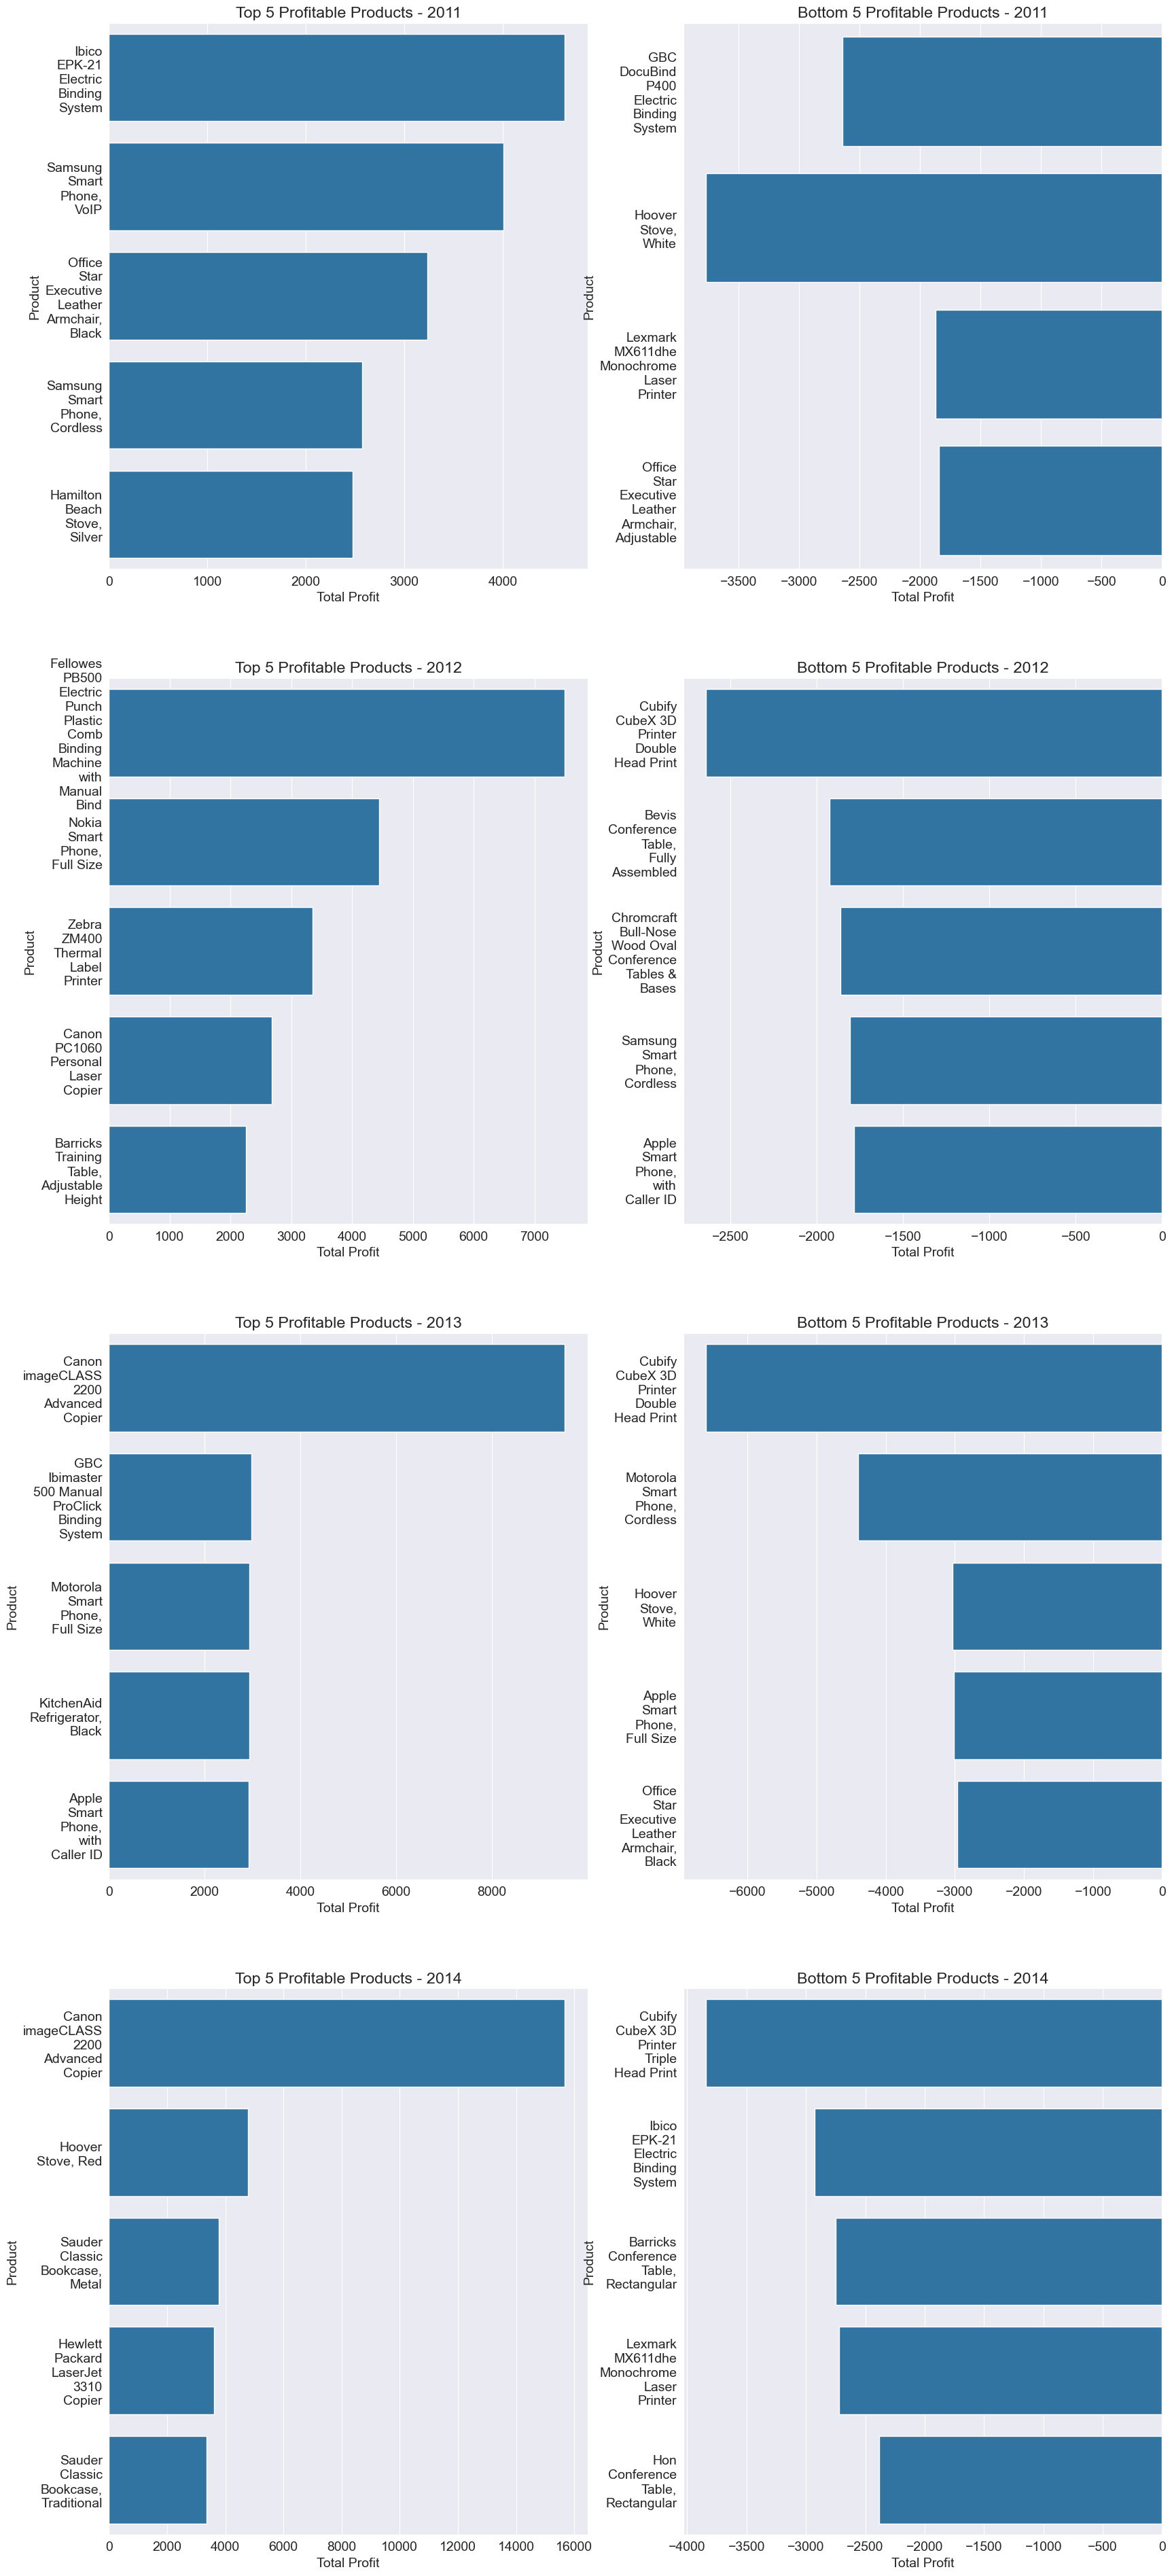

In [129]:
fig, axes = plt.subplots(4, 2, figsize=(20, 48))
# fig.subplots_adjust(hspace=0.5)
top_5_dfs = {'2011': df_products_profit[df_products_profit.order_year == 2011].sort_values('total_profit', ascending=False).head(),
             '2012': df_products_profit[df_products_profit.order_year == 2012].sort_values('total_profit', ascending=False).head(),
             '2013': df_products_profit[df_products_profit.order_year == 2013].sort_values('total_profit', ascending=False).head(),
             '2014': df_products_profit[df_products_profit.order_year == 2014].sort_values('total_profit', ascending=False).head()}
bottom_5_dfs = {'2011': df_products_profit[df_products_profit.order_year == 2011].sort_values('total_profit', ascending=True).head(),
             '2012': df_products_profit[df_products_profit.order_year == 2012].sort_values('total_profit', ascending=True).head(),
             '2013': df_products_profit[df_products_profit.order_year == 2013].sort_values('total_profit', ascending=True).head(),
             '2014': df_products_profit[df_products_profit.order_year == 2014].sort_values('total_profit', ascending=True).head()}

first_idx = 0
for year in (2011, 2012, 2013, 2014):
    axes[first_idx,0].set_title(f"Top 5 Profitable Products - {year}")
    axes[first_idx,0].set_xlabel('Total Profit')
    axes[first_idx,0].set_ylabel('Product')
    sns.barplot(x='total_profit', y='product_name', data=top_5_dfs[str(year)], 
                errorbar=None, estimator="sum", ax=axes[first_idx,0])
    wrap_labels(axes[first_idx,0], 10)

    axes[first_idx,1].set_title(f"Bottom 5 Profitable Products - {year}")
    axes[first_idx,1].set_xlabel('Total Profit')
    axes[first_idx,1].set_ylabel('Product')
    sns.barplot(x='total_profit', y='product_name', data=bottom_5_dfs[str(year)], 
                errorbar=None, estimator="sum", ax=axes[first_idx,1])
    wrap_labels(axes[first_idx,1], 10)
    
    first_idx += 1

### Total Negative Profits

In [136]:
df_neg_profits_by_year = df_agg_products[df_agg_products.total_profit < 0].groupby(['order_year'], as_index=False).total_profit.sum()

In [137]:
df_neg_profits_by_year.dtypes

order_year        int64
total_profit    float64
dtype: object

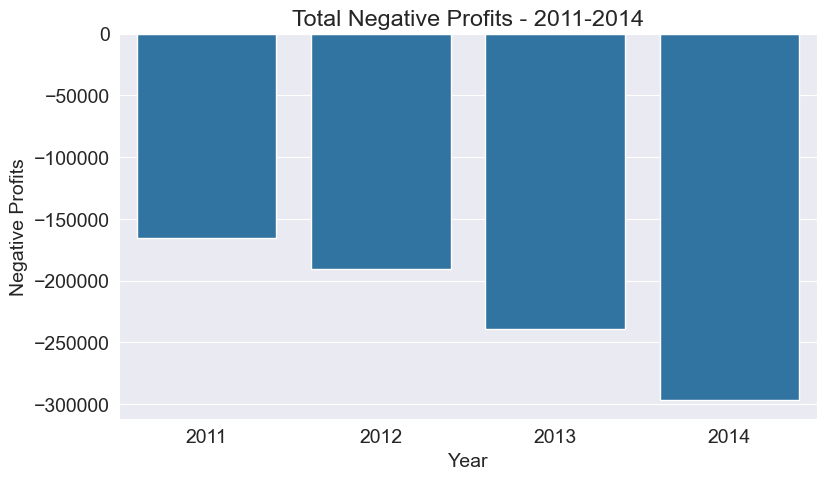

In [138]:
ax = sns.barplot(x='order_year', y='total_profit', data=df_neg_profits_by_year, errorbar=None);
ax.set(xlabel='Year', ylabel='Negative Profits', title='Total Negative Profits - 2011-2014')
plt.show()

Discussion/Analysis: Attention should be given to all products with negative profits.  The total negative profits are growing year over year. 

### What were the overall total profits by year?

In [144]:
df_profits_by_year = df_agg_products.groupby(['order_year'], as_index=False).total_profit.sum()

In [145]:
df_profits_by_year['positive_profit_only'] = False

In [146]:
df_profits_by_year

,order_year,total_profit,positive_profit_only
0,2011,248397.11434,False
1,2012,306982.88770,False
2,2013,405774.40148,False
3,2014,503481.24146,False


In [147]:
df_profits_by_year_pos = df_agg_products[df_agg_products.total_profit > 0].groupby(['order_year'], as_index=False).total_profit.sum()

In [149]:
df_profits_by_year_pos['positive_profit_only'] = True

In [152]:
df_profits_by_year_all = pd.concat([df_profits_by_year, df_profits_by_year_pos])

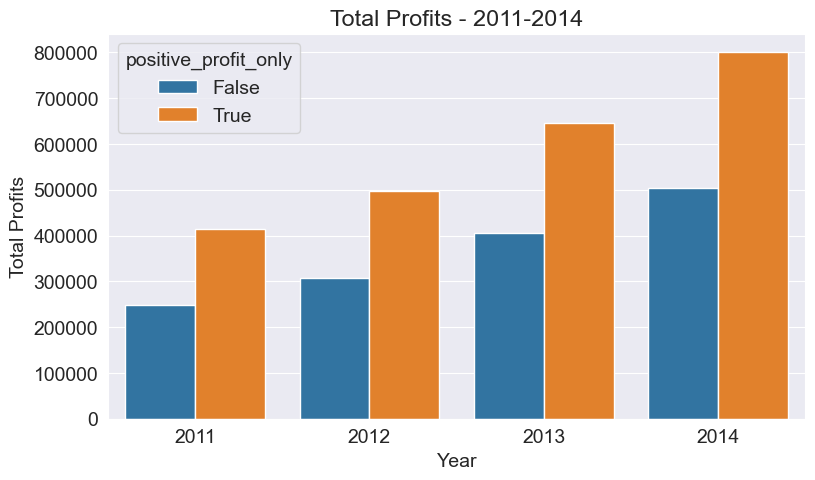

In [153]:
ax = sns.barplot(x='order_year', y='total_profit', data=df_profits_by_year_all, hue="positive_profit_only", errorbar=None);
ax.set(xlabel='Year', ylabel='Total Profits', title='Total Profits - 2011-2014')
plt.show()

Discussion/Analysis: The orange bars show what the profit would have been had the negative profit products not been sold.  The blue bars are the actual total profits with the negative profits included.